Copyright (c) Meta Platforms, Inc. and affiliates.
All rights reserved.

This source code is licensed under the terms described in the LICENSE file in
the root directory of this source tree.

<a aria-label="Meta home" href="https://www.llama.com/docs" tabindex="0" target="_blank" >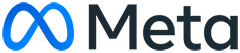</a>

<a href="https://colab.research.google.com/github/meta-llama/prompt-ops/blob/main/notebook/prompt-ops_101_cerebras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Getting Started with [prompt-ops](https://github.com/meta-llama/prompt-ops)

This notebook will guide you through the process of using [prompt-ops](https://github.com/meta-llama/prompt-ops) to optimize your prompts for Llama models. We'll cover:

1. Introduction to prompt-ops
2. Setting up your environment
3. Creating a sample project
4. Running prompt optimization
5. Analyzing the results
6. Advanced usage and customization

## 1. Introduction to prompt-ops

### What is prompt-ops?

prompt-ops is a Python package that **automatically optimizes prompts** for Llama models. It transforms prompts that work well with other LLMs into prompts that are optimized for Llama models, improving performance and reliability.

### How It Works

prompt-ops takes three key inputs:
1. Your existing system prompt
2. A dataset of query-response pairs for evaluation and optimization
3. A configuration file specifying model parameters and optimization details

It then applies optimization techniques to transform your prompt into one that works better with Llama models, and provides metrics to measure the improvement.

### Using Cerebras Inference

This notebook demonstrates using prompt-ops with **Cerebras Inference API**, which provides ultra-fast inference for Llama models. Cerebras offers excellent performance and speed for prompt optimization workloads, making it ideal for rapid iteration.

## 2. Setting up your environment

Let's start by installing the Prompt ops package and setting up our environment. You can install it either from PyPI or directly from the source code.

In [28]:
# Create a virtual environment
!conda create -n prompt-ops-test2 python=3.10 -y
!conda activate prompt-ops-test2


/Users/justinai/anaconda3/lib/python3.12/site-packages/conda/base/context.py:201: FutureWarning: Adding 'defaults' to channel list implicitly is deprecated and will be removed in 25.3. 

To remove this warning, please choose a default channel explicitly with conda's regular configuration system, e.g. by adding 'defaults' to the list of channels:

  conda config --add channels defaults

For more information see https://docs.conda.io/projects/conda/en/stable/user-guide/configuration/use-condarc.html

  deprecated.topic(
/Users/justinai/anaconda3/lib/python3.12/site-packages/conda/base/context.py:201: FutureWarning: Adding 'defaults' to channel list implicitly is deprecated and will be removed in 25.3. 

To remove this warning, please choose a default channel explicitly with conda's regular configuration system, e.g. by adding 'defaults' to the list of channels:

  conda config --add channels defaults

For more information see https://docs.conda.io/projects/conda/en/stable/user-guide/conf

In [34]:
conda init

no change     /Users/justinai/anaconda3/condabin/conda
no change     /Users/justinai/anaconda3/bin/conda
no change     /Users/justinai/anaconda3/bin/conda-env
no change     /Users/justinai/anaconda3/bin/activate
no change     /Users/justinai/anaconda3/bin/deactivate
no change     /Users/justinai/anaconda3/etc/profile.d/conda.sh
no change     /Users/justinai/anaconda3/etc/fish/conf.d/conda.fish
no change     /Users/justinai/anaconda3/shell/condabin/Conda.psm1
no change     /Users/justinai/anaconda3/shell/condabin/conda-hook.ps1
no change     /Users/justinai/anaconda3/lib/python3.12/site-packages/xontrib/conda.xsh
no change     /Users/justinai/anaconda3/etc/profile.d/conda.csh
no change     /Users/justinai/.bash_profile
No action taken.

Note: you may need to restart the kernel to use updated packages.


In [1]:
conda activate prompt-ops-test2


CondaError: Run 'conda init' before 'conda activate'


Note: you may need to restart the kernel to use updated packages.


In [2]:
# Recommended: Install from source
!git clone https://github.com/meta-llama/prompt-ops.git


# Alternative: Install from PyPI (may have naming transition issues, still on version 0.0.7)
# pip install llama-prompt-ops


Cloning into 'prompt-ops'...
remote: Enumerating objects: 1160, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 1160 (delta 43), reused 41 (delta 41), pack-reused 1110 (from 2)
Receiving objects: 100% (1160/1160), 831.67 KiB | 6.40 MiB/s, done.
Resolving deltas: 100% (557/557), done.


In [3]:
!cd prompt-ops
!pip install -e .

Obtaining file:///Users/justinai/Documents/Code/llama-prompt-ops
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for prompt-ops (pyproject.toml) ... done
  Created wheel for prompt-ops: filename=prompt_ops-0.0.9-0.editable-py3-none-any.whl size=6952 sha256=785bb0f2125ab8fd3a084126bec44b8c126e69f1d9b5c9368d621d256771acb4
  Stored in directory: /private/var/folders/s9/5_z22sq92_gf508gtrm9njm40000gn/T/pip-ephem-wheel-cache-nbspjqqy/wheels/8a/34/65/b5980476e16151db2c9dfa1d8434fb8917e868cf6264d07151
Successfully built prompt-ops
  Attempting uninstall: prompt-ops
    Found existing installation: prompt-ops 0.0.9
    Uninstalling prompt-ops-0.0.9:
      Successfully uninstalled prompt-ops-0.0.9

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip


## 3. Creating a Sample Project

Prompt ops provides a convenient way to create a sample project with all the necessary files. Let's create a sample project to get started.

In [4]:
# Create a sample project
!prompt-ops create my-cerebras-project-2

[1/6] Creating project structure...
✓ Created project directory: my-cerebras-project-2
✓ Created data directory
✓ Created prompts directory

[2/6] Generating configuration file...
✓ Created config.yaml

[3/6] Creating prompt template...
✓ Created prompt.txt

[4/6] Generating sample dataset...
✓ Created dataset.json with 200 examples

[5/6] Setting up environment...
✓ Created .env file

[6/6] Creating documentation...
✓ Created README.md

✨ Done! Project 'my-cerebras-project-2' created successfully!

To get started:
1. cd my-cerebras-project-2
2. Edit the .env file to add your OPENROUTER_API_KEY
   You can get an API key at: https://openrouter.ai/
3. Run: prompt-ops migrate


### Update config.yaml for Cerebras Inference

Here's the configuration for using Cerebras Inference API with ultra-fast Llama 3.3 70B:

```yaml
system_prompt:
  file: prompts/prompt.txt
  inputs:
  - question
  outputs:
  - answer

dataset:
  path: data/dataset.json
  input_field:
  - fields
  - input
  golden_output_field: answer

model:
  # Cerebras inference with Llama 3.3 70B
  task_model: cerebras/llama3.3-70b
  proposer_model: cerebras/llama3.3-70b
  
  # Cerebras API endpoint
  api_base: https://api.cerebras.ai/v1
  
  # Temperature and generation settings
  temperature: 0.0
  max_tokens: 4096

metric:
  class: prompt_ops.core.metrics.FacilityMetric
  strict_json: false
  output_field: answer

optimization:
  strategy: basic
```

**Note**: Make sure to set your `CEREBRAS_API_KEY` environment variable before running the optimization.

This command creates a directory called `my-cerebras-project` with a sample configuration and dataset. Let's explore the files that were created:

In [17]:
!ls -la my-cerebras-project

total 24
drwxr-xr-x@  7 justinai  staff   224 Oct 23 17:31 .
drwxr-xr-x@ 45 justinai  staff  1440 Oct 23 17:31 ..
-rw-r--r--@  1 justinai  staff    81 Oct 23 17:32 .env
-rw-r--r--@  1 justinai  staff   533 Oct 23 17:31 README.md
-rw-r--r--@  1 justinai  staff   615 Oct 23 17:33 config.yaml
drwxr-xr-x@  3 justinai  staff    96 Oct 23 17:31 data
drwxr-xr-x@  3 justinai  staff    96 Oct 23 17:31 prompts


The sample project includes:
- `.env`: A file for your Cerebras API key
- `README.md`: Documentation for the project
- `config.yaml`: Configuration file for prompt optimization
- `data/dataset.json`: Sample dataset for evaluation and optimization
- `prompts/prompt.txt`: Sample system prompt to optimize

### Setting up your Cerebras API Key

Before running optimization, you need to add your Cerebras API key to the `.env` file:

```bash
echo "CEREBRAS_API_KEY=csk-your-api-key-here" > my-cerebras-project/.env
```

Let's examine the configuration file:

In [18]:
!cat my-cerebras-project/config.yaml

system_prompt:
  file: prompts/prompt.txt
  inputs:
  - question
  outputs:
  - answer

dataset:
  path: data/dataset.json
  input_field:
  - fields
  - input
  golden_output_field: answer

model:
  # Cerebras inference with Llama 3.3 70B
  task_model: cerebras/llama3.3-70b-instruct
  proposer_model: cerebras/llama3.3-70b-instruct
  
  # Cerebras API endpoint
  api_base: https://api.cerebras.ai/v1
  
  # Temperature and generation settings
  temperature: 0.0
  max_tokens: 4096

metric:
  class: prompt_ops.core.metrics.FacilityMetric
  strict_json: false
  output_field: answer

optimization:
  strategy: basic

The configuration file specifies:
- The system prompt to optimize
- The dataset to use for evaluation and optimization
- The model to use for optimization and evaluation
- The metric to use for evaluation
- The optimization strategy to use

Let's also look at the sample prompt and dataset:

In [19]:
!cat my-cerebras-project/prompts/prompt.txt

You are a helpful assistant. Extract and return a json with the following keys and values:
- "urgency" as one of `high`, `medium`, `low`
- "sentiment" as one of `negative`, `neutral`, `positive`
- "categories" Create a dictionary with categories as keys and boolean values (True/False), where the value indicates whether the category is one of the best matching support category tags from: `emergency_repair_services`, `routine_maintenance_requests`, `quality_and_safety_concerns`, `specialized_cleaning_services`, `general_inquiries`, `sustainability_and_environmental_practices`, `training_and_support_requests`, `cleaning_services_scheduling`, `customer_feedback_and_complaints`, `facility_management_issues`
Your complete message should be a valid json string that can be read directly and only contain the keys mentioned in the list above. Never enclose it in ```json...```, no newlines, no unnessacary whitespaces.


In [20]:
!head -n 20 my-cerebras-project/data/dataset.json

[
  {
    "fields": {
      "input": "Subject: Urgent Assistance Required for Specialized Cleaning Services\n\nDear ProCare Facility Solutions Support Team,\n\nI hope this message finds you well. My name is [Sender], and my family and I have been availing your services for our home for the past year. We have always appreciated the high standards and professionalism your team brings to maintaining our living environment.\n\nHowever, we are currently facing an urgent issue that requires immediate attention. We recently hosted a large gathering at our home, and despite our best efforts, there are several areas that now require specialized cleaning. Specifically, we need deep cleaning for our carpets and upholstery, as well as thorough window washing. The situation is quite pressing as we have more guests arriving soon, and we want to ensure our home is in pristine condition to welcome them.\n\nWe have tried some basic cleaning ourselves, but the results have not been satisfactory. Given t

## 4. Running Prompt Optimization

Now that we have our sample project set up, let's run the prompt optimization process. We'll use the `migrate` command, which takes a configuration file as input and outputs an optimized prompt.

In [23]:
# Run prompt optimization with Cerebras
!cd my-cerebras-project && prompt-ops migrate --config config.yaml --api-key-env CEREBRAS_API_KEY

Loaded environment variables from .env
Loaded configuration from config.yaml
2025-10-23 18:08:02,050 | INFO    |  Using model with DSPy: cerebras/llama3.3-70b
Using the same model for task and proposer: cerebras/llama3.3-70b
Using metric: FacilityMetric
Resolved relative dataset path to: /Users/justinai/Documents/Code/llama-prompt-ops/my-cerebras-project/data/dataset.json
Using dataset adapter: ConfigurableJSONAdapter
Using BasicOptimizationStrategy from config for model: llama3.3-70b
2025-10-23 18:08:02,058 - root - INFO - Loaded 200 examples from /Users/justinai/Documents/Code/llama-prompt-ops/my-cerebras-project/data/dataset.json
2025-10-23 18:08:02,058 - root - INFO - Created dataset splits:
2025-10-23 18:08:02,058 - root - INFO -   - Training:   50 examples (25.0% of total)
2025-10-23 18:08:02,058 - root - INFO -   - Validation: 50 examples (25.0% of total)
2025-10-23 18:08:02,058 - root - INFO -   - Testing:    100 examples (50.0% of total)
Loaded prompt from file: /Users/justina

The optimization process will take a few minutes to complete. It involves:
1. Loading your system prompt and dataset
2. Analyzing the prompt structure and content
3. Applying optimization techniques specific to Llama models
4. Evaluating the optimized prompt against the original prompt
5. Saving the optimized prompt to the `results/` directory

Let's check the results directory to see the optimized prompt. If the optimizer successfully found a better prompt, it will be saved in the `results/` directory. You may need to run the optimization process again with different parameters or a larger dataset if the prompt is the same as the original.

In [ ]:
!ls -la my-cerebras-project/results/

ls: my-notebook-project/results/: No such file or directory


The optimized prompt is saved as a YAML file with a timestamp. Let's examine the contents of the optimized prompt:

In [ ]:
import glob
import yaml
import os

# Find the most recent result file
result_files = glob.glob('my-cerebras-project/results/*.yaml')
if result_files:
    latest_result = max(result_files, key=os.path.getctime)
    print(f"Latest result file: {latest_result}")
    
    # Load and display the optimized prompt
    with open(latest_result, 'r') as f:
        result = yaml.safe_load(f)
        print("\nOptimized System Prompt:")
        print(result.get('system', 'No system prompt found'))
else:
    print("No result files found. Make sure the optimization process completed successfully.")

No result files found. Make sure the optimization process completed successfully.


## 5. Analyzing the Results

Let's compare the original prompt with the optimized prompt to understand the changes made during optimization.

In [ ]:
# Load the original prompt
with open('my-cerebras-project/prompts/prompt.txt', 'r') as f:
    original_prompt = f.read()

# Find the most recent result file again
result_files = glob.glob('my-cerebras-project/results/*.yaml')
if result_files:
    latest_result = max(result_files, key=os.path.getctime)
    
    # Load the optimized prompt
    with open(latest_result, 'r') as f:
        result = yaml.safe_load(f)
        optimized_prompt = result.get('system', 'No system prompt found')
    
    # Print the comparison
    print("Original Prompt:")
    print("-" * 80)
    print(original_prompt)
    print("\n" + "-" * 80)
    print("\nOptimized Prompt:")
    print("-" * 80)
    print(optimized_prompt)
    print("-" * 80)
else:
    print("No result files found. Make sure the optimization process completed successfully.")

No result files found. Make sure the optimization process completed successfully.


### Key Differences in the Optimized Prompt

The optimized prompt typically includes several improvements:

1. **Better Structure**: Llama models respond better to clear, structured instructions
2. **Llama-Specific Formatting**: Formatting that works better with Llama's training patterns
3. **Few-Shot Examples**: Examples that help the model understand the expected output format
4. **Clear Output Expectations**: More explicit instructions about what the output should look like

These changes can significantly improve the model's performance on your specific task.

## 6. Advanced Usage and Customization

### Using Your Own Data

To use your own data with Prompt ops, you'll need to:

1. Prepare your dataset in JSON format
2. Create a system prompt file
3. Create a configuration file

Check out the comprehensive guide [here](https://github.com/meta-llama/prompt-ops/tree/main/docs) to learn more.

Now, let's see how to create a custom configuration file:



In [ ]:
%%writefile custom_config.yaml
system_prompt:
  file: "path/to/your/prompt.txt"
  inputs: ["question"]
  outputs: ["answer"]

# Dataset configuration
dataset:
  path: "path/to/your/dataset.json"
  input_field: "question"  # or ["fields", "input"] for nested fields
  golden_output_field: "answer"

# Model configuration
model:
  # Cerebras Inference with Llama 3.3 70B
  task_model: "cerebras/llama3.3-70b-instruct"
  proposer_model: "cerebras/llama3.3-70b-instruct"
  
  # Cerebras API endpoint
  api_base: "https://api.cerebras.ai/v1"
  
  # Generation settings
  temperature: 0.0
  max_tokens: 4096

# Metric configuration
metric:
  class: "prompt_ops.core.metrics.StandardJSONMetric"
  strict_json: false
  output_field: "answer"

# Optimization settings
optimization:
  strategy: "llama"

Writing custom_config.yaml


### Using Different Metrics

Prompt ops supports different metrics for evaluating prompt performance. The default is `StandardJSONMetric`, but you can use other metrics like `FacilityMetric` for specific use cases.

Here's an example of using the `FacilityMetric` for the facility support analyzer use case:

In [ ]:
%%writefile facility_config.yaml
system_prompt:
  file: "prompts/facility_prompt.txt"
  inputs: ["question"]
  outputs: ["answer"]

# Dataset configuration
dataset:
  path: "data/facility_dataset.json"
  input_field: ["fields", "input"]
  golden_output_field: "answer"

# Model configuration
model:
  # Cerebras Inference with Llama 3.3 70B
  task_model: "cerebras/llama3.3-70b-instruct"
  proposer_model: "cerebras/llama3.3-70b-instruct"
  
  # Cerebras API endpoint
  api_base: "https://api.cerebras.ai/v1"
  
  # Generation settings
  temperature: 0.0
  max_tokens: 4096

# Metric configuration
metric:
  class: "prompt_ops.core.metrics.FacilityMetric"
  strict_json: false
  output_field: "answer"

# Optimization settings
optimization:
  strategy: "llama"

Writing facility_config.yaml


### Using Different Models

Prompt ops supports different models through various inference providers. You can use Cerebras, OpenRouter, vLLM, or NVIDIA NIMs depending on your infrastructure needs.

With Cerebras, you have access to ultra-fast Llama models. Here's an example configuration using a different Llama model size:

In [ ]:
%%writefile different_model_config.yaml
system_prompt:
  file: "prompts/prompt.txt"
  inputs: ["question"]
  outputs: ["answer"]

# Dataset configuration
dataset:
  path: "data/dataset.json"
  input_field: "question"
  golden_output_field: "answer"

# Model configuration
model:
  # Using Llama 3.1 8B for faster, cost-effective optimization
  task_model: "cerebras/llama3.1-8b-instruct"
  proposer_model: "cerebras/llama3.1-8b-instruct"
  
  # Cerebras API endpoint
  api_base: "https://api.cerebras.ai/v1"
  
  # Generation settings
  temperature: 0.0
  max_tokens: 4096

# Metric configuration
metric:
  class: "prompt_ops.core.metrics.StandardJSONMetric"
  strict_json: false
  output_field: "answer"

# Optimization settings
optimization:
  strategy: "llama"

Writing different_model_config.yaml


## Conclusion

In this notebook, we've covered:

1. Introduction to Prompt ops and its benefits
2. Creating a sample project
3. Setting up your environment and Cerebras API key
4. Running prompt optimization with Cerebras Inference
5. Analyzing the results
6. Advanced usage and customization options

Prompt ops provides a powerful way to optimize your prompts for Llama models, improving performance and reliability. By using Cerebras Inference API, you get ultra-fast inference speeds that make prompt optimization rapid and efficient.

### Key Takeaways with Cerebras

- **Ultra-Fast Inference**: Cerebras provides exceptional inference speed for Llama models
- **Easy Integration**: Simply configure the API endpoint and model name
- **Production Ready**: Cerebras scales from development to production seamlessly

By following the steps in this notebook, you can start optimizing your own prompts with Cerebras and building more effective LLM applications.

For more information:
- [prompt-ops documentation](https://github.com/meta-llama/prompt-ops/tree/main/docs)
- [Cerebras Inference API](https://cerebras.ai/)
- Explore example use cases in the prompt-ops repository